In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Letmeanalyzethedata',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:/Ecommerce py project/CSV'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

In [151]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\Osama Adeel\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [70]:
pip install numpy


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\Osama Adeel\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: C:\Users\Osama Adeel\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\Osama Adeel\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [171]:
pip install pysqlite3

     ---------------------------------------- 0.0/40.8 kB ? eta -:--:--
     ------------------------------ --------- 30.7/40.8 kB 1.3 MB/s eta 0:00:01
     ------------------------------ --------- 30.7/40.8 kB 1.3 MB/s eta 0:00:01
     ------------------------------ --------- 30.7/40.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 40.8/40.8 kB 216.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pysqlite3
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [12 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\pysqlite3
  copying pysqlite3\dbapi2.py -> build\lib.win-amd64-cpython-312\pysqlite3
  copying pysqlite3\__init__.py -> build\lib.win-amd64-cpython-312\pysqlite3
  running build_ext
  Builds a C extension linking against libsqlite3 library
  building 'pysqlite3._sqlite3' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pysqlite3
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pysqlite3)

[notice] A new release of pip is available: 24.1.1 -> 24.2
[not

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = 'localhost',
                            username = 'root',
                            password = 'Letmeanalyzethedata',
                            database = 'ecommerce')

cur = db.cursor()

# 1. List all unique cities where customers are located.   

In [153]:
query = """ select distinct customer_city from customers """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["City"])
df.head(10)

,City
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo
7,curitiba
8,belo horizonte
9,montes claros


# 2. Count the number of orders placed in 2017.

In [226]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
print("Total orders in the year 2017 are", data[0][0])

Total orders in the year 2017 are 180404


# 3. Find the total sales per category.   


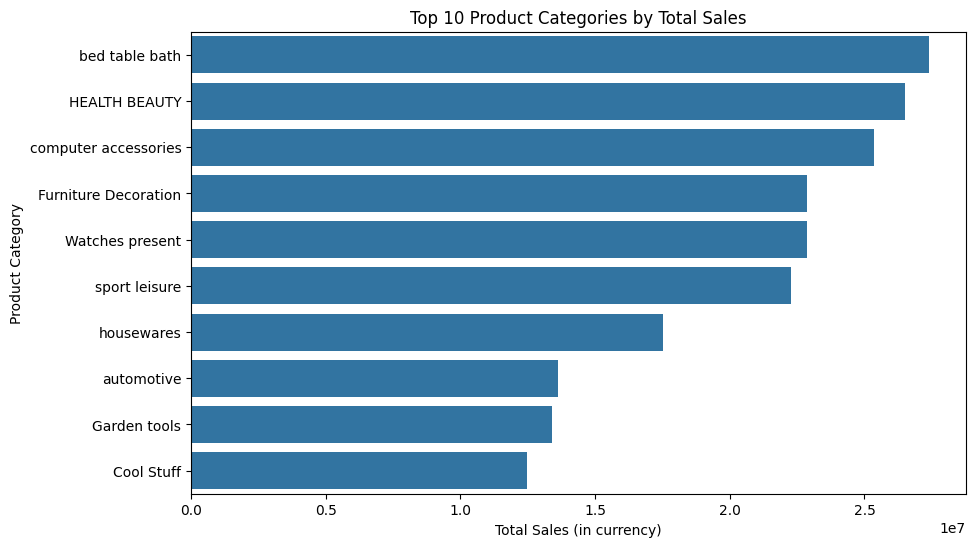

In [228]:
query = """ select products.product_category category, 
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Sales"])
df_top10 = df.sort_values(by="Sales", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Sales", y="Category", data=df_top10)
plt.title('Top 10 Product Categories by Total Sales')
plt.xlabel('Total Sales (in currency)')
plt.ylabel('Product Category')
plt.show()

# 4. Calculate the percentage of orders that were paid in installments.


In [225]:
query = """ select (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100 from payments """

cur.execute(query)
data = cur.fetchall()
print("The percentage of orders that were paid in installments is",data[0][0])

The percentage of orders that were paid in installments is 99.9981


# 5. Count the number of customers from each state. 


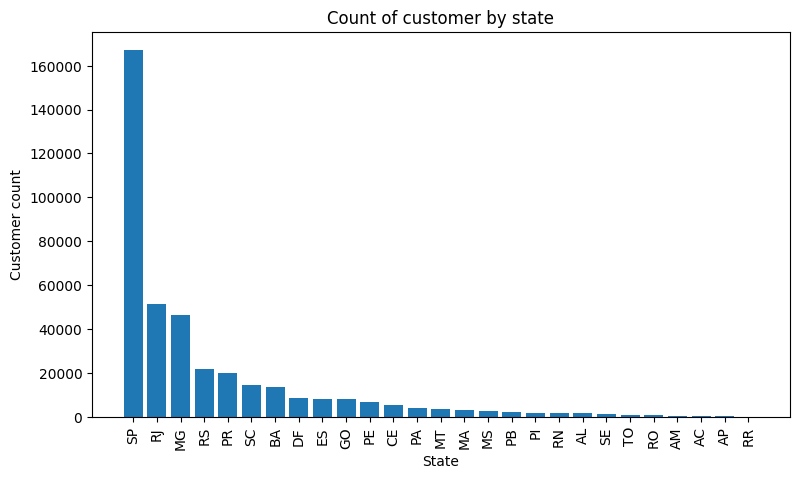

In [227]:
query = """ select customer_state, count(customer_id) from customers group by customer_state """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state","Customer_count"])
df = df.sort_values(by = "Customer_count", ascending= False)

plt.figure(figsize= (9,5))
plt.bar(df["state"], df["Customer_count"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Customer count")
plt.title("Count of customer by state")
plt.show()

# 6. Calculate the number of orders per month in 2018. 


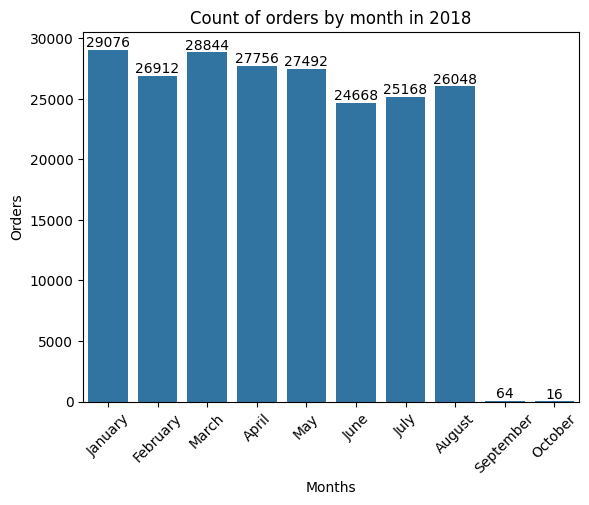

In [236]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year (order_purchase_timestamp) = 2018 
group by months"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Months", "Orders"])
o = ["January","February","March","April","May","June","July","August","September","October"]

ax = sns.barplot(x = df["Months"], y = df["Orders"], data = df, order = o)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("Count of orders by month in 2018")
plt.show()

# 7. Find the average number of products per order, grouped by customer city. 


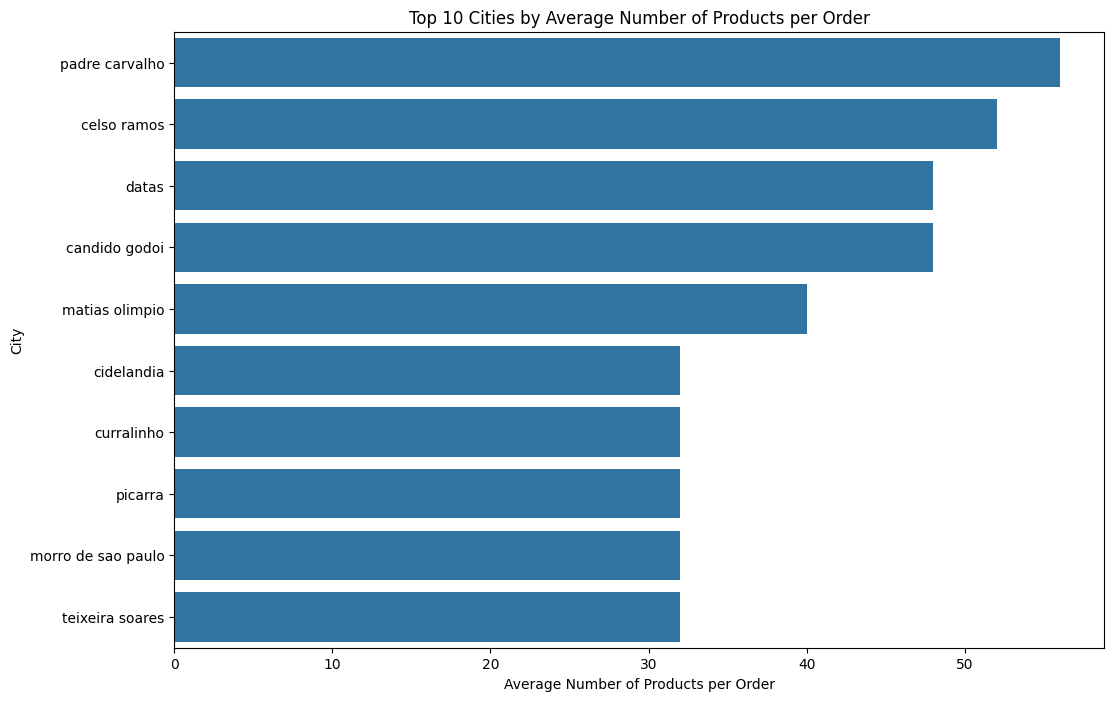

In [230]:
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id =  order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc; """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["City", "Average Orders"])
df_top10 = df.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x="Average Orders", y="City", data=df_top10)
plt.title('Top 10 Cities by Average Number of Products per Order')
plt.xlabel('Average Number of Products per Order')
plt.ylabel('City')
plt.show()

# 8. Calculate the percentage of total revenue contributed by each product category.


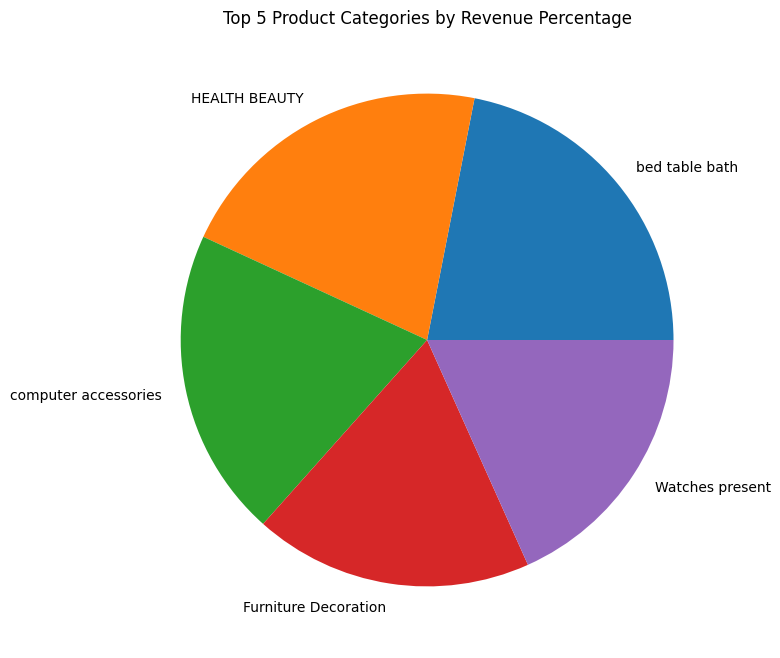

In [231]:
query = """select products.product_category category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc ; """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category", "Sales Percentage"])
df_top5 = df.head(5)

plt.figure(figsize=(10, 8))
plt.pie(df_top5["Sales Percentage"], labels=df_top5["Category"])
plt.title('Top 5 Product Categories by Revenue Percentage')
plt.show()

# 9. Identify the correlation between product price and the number of times a product has been purchased.


In [30]:
query = """select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "order count","Price"])

arr1 = df["order count"]
arr2 = df["Price"]

a = np.corrcoef([arr1,arr2])
print("The coorelation between the price and the number of times a product has been purchased is", a[0][1])

The coorelation between the price and the number of times a product has been purchased is -0.10631514167157562


# 10. Calculate the total revenue generated by each seller, and rank them by revenue.


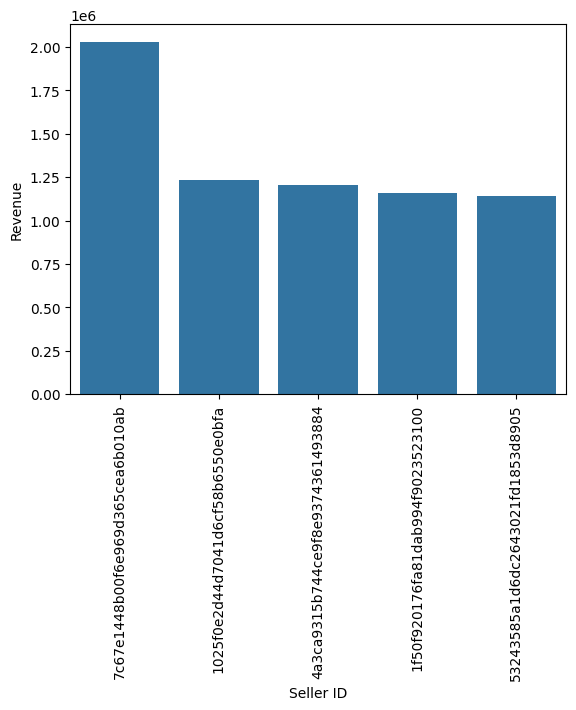

In [233]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Seller ID", "Revenue", "Rank"])
df = df.head()

sns.barplot(x = "Seller ID", y = "Revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# 11. Calculate the moving average of order values for each customer over their order history.


In [237]:
query = """select customer_id, order_purchase_timestamp, payment, avg(payment) over (partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
from 
(select distinct orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from orders join payments on orders.order_id = payments.order_id) as a;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["customer_id", "order_purchase_timestamp", "payment", "mov_avg"])
df.head(50)

,customer_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.80
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.40
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.23
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.71


# 12. Calculate the cumulative sales per month for each year.


In [238]:
query = """ select years, months, payment, round(sum(payment) over(order by years, months), 2) as cumulative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a;"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Year", "Month", "Payment", "Cumulative_Sales"])
df

,Year,Month,Payment,Cumulative_Sales
0,2016,9,2017.92,2017.92
1,2016,10,472723.84,474741.76
2,2016,12,156.96,474898.72
3,2017,1,1107904.32,1582803.04
4,2017,2,2335264.08,3918067.12
5,2017,3,3598908.80,7516975.92
6,2017,4,3342304.24,10859280.16
7,2017,5,4743350.56,15602630.72
8,2017,6,4090211.04,19692841.76
9,2017,7,4739063.36,24431905.12


# 13. Calculate the year-over-year growth rate of total sales.


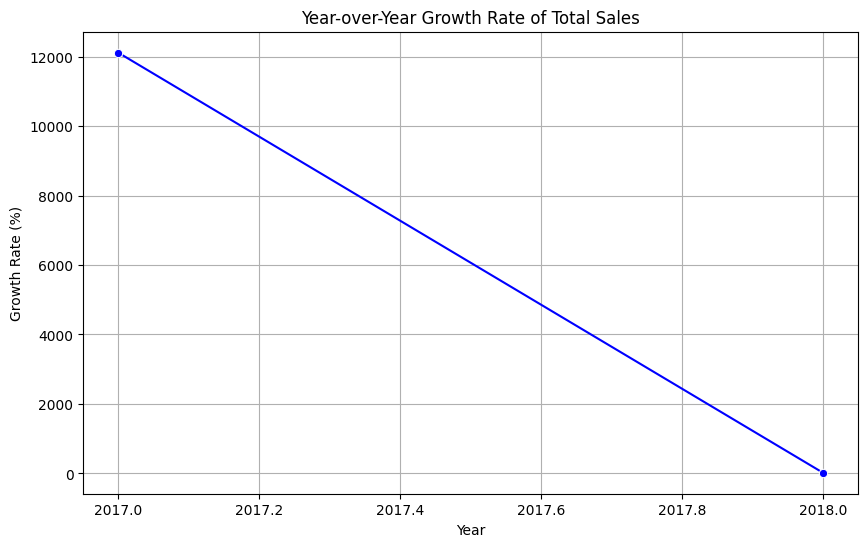

In [160]:
query = """ with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))
/lag(payment, 1) over(order by years))* 100 from a;"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Year", "GrowthRate"])
df

plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="GrowthRate", data=df, marker='o', color='b')
plt.title('Year-over-Year Growth Rate of Total Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


# 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [163]:
query = """with a as (select customers.customer_id, min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on a.customer_id = orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id;"""

cur.execute(query)
data = cur.fetchall()
print("None of our customer returned in 6 month with a purchase so our data is",data[0][0])

None of our customer returned in 6 month with a purchase so our data is None


# 15. Identify the top 3 customers who spent the most money in each year.

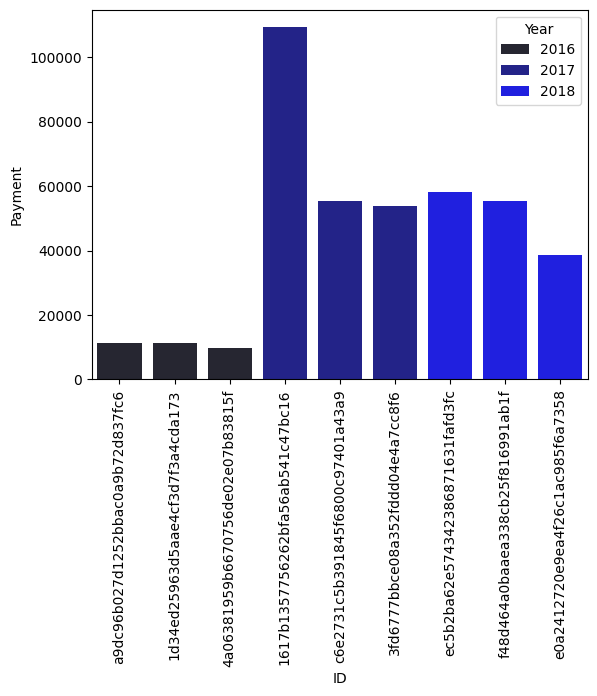

In [240]:
query = """select years, customer_id, payment, d_rank
from 
(select year(orders.order_purchase_timestamp) years, orders.customer_id, 
sum(payments.payment_value) payment, dense_rank() over (partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value)desc) d_rank
from orders join payments
on orders.order_id = payments.order_id
group by  year(orders.order_purchase_timestamp), orders.customer_id) as a
where d_rank <= 3;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Year","ID","Payment","Rank"])
df

sns.barplot(x = "ID", y = "Payment", data = df, hue = "Year", palette = "dark:blue")
plt.xticks(rotation=90)
plt.show()